In [5]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

C:\Users\prera\AppData\Local\Temp\ipykernel_19028\1929798846.py:6: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav


In [6]:
flux_path = os.path.join('V4046Sgr_H2flux.pkl')

In [7]:
target_fluxes = pd.read_pickle(flux_path)
target_wavelengths = readsav('V4046Sgr_H2wavelengths.sav')
with open('V4046Sgr_H2velocity.pkl', 'rb') as f:
	target_velocity = pickle.load(f)
target_fluxes = pd.read_pickle('V4046Sgr_H2flux.pkl')
with open('V4046Sgr_H2fluxerr.pkl' , 'rb') as f:
	target_fluxerr = pickle.load(f)


In [8]:
target_fluxes

{'1500.45': 35791   -2.705435e-16
 35792    5.818555e-16
 35793   -5.276942e-17
 35794    1.317858e-15
 35795   -1.607009e-15
              ...     
 35949   -8.307173e-16
 35950    1.057934e-15
 35951   -4.506729e-16
 35952    1.795944e-15
 35953    1.386992e-16
 Length: 163, dtype: float64,
 '1489.57': 34902    1.835047e-16
 34903    8.827737e-16
 34904    6.456708e-16
 34905    1.221044e-15
 34906   -8.986266e-17
              ...     
 35059   -3.158377e-16
 35060   -1.292625e-16
 35061   -2.572359e-16
 35062   -2.640099e-17
 35063    5.844336e-16
 Length: 162, dtype: float64,
 '1402.65': 26719    3.395387e-16
 26720    2.352085e-16
 26721   -4.920628e-16
 26722   -1.726631e-16
 26723   -8.931877e-16
              ...     
 26902    6.915626e-16
 26903    2.725210e-17
 26904   -6.246443e-16
 26905   -6.476275e-16
 26906    1.957832e-16
 Length: 188, dtype: float64,
 '1398.95': 26348    1.872938e-16
 26349    1.535152e-16
 26350   -1.232758e-15
 26351   -6.747793e-16
 26352   -9.759

['1338.56', '1460.17']


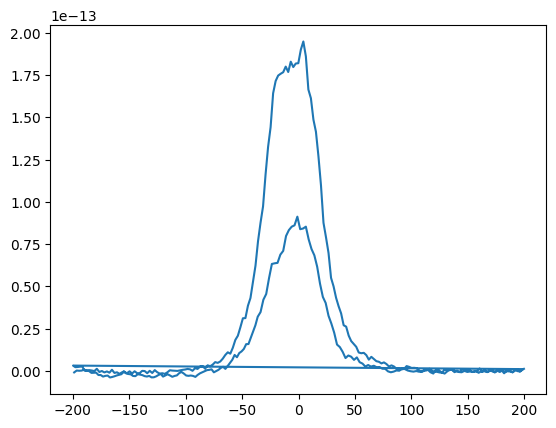

In [17]:
def get_prog_data(lines_to_fit, ref_wave_array, velocity_array, flux_array, fluxerr_array):
    """Concatenate emission lines for model fitting
    :param lines_to_fit: Wavelengths of emission lines (usually for a single progression)
    :param ref_wave_array: List of wavelengths, in order that the data is stored in Keri-style arrays
    :param velocity_array: Velocity space of all emission lines
    :param flux_array: Fluxes of all emission lines
    :param fluxerr_array: Flux uncertainties for all emission lines
    """
    #Get indices of emission lines to concatenate in data arrays
    prog_wave_keys = [str(round(wave, 2))[0:7] for wave in lines_to_fit]
    print(prog_wave_keys)
    #Start concatenating! Only want to use indices 0:310, because models have a weird uptick in flux at the maximum indices
    prog_velocity = np.concatenate([velocity_array[key] for key in prog_wave_keys])
    prog_flux = np.concatenate([flux_array[key] for key in prog_wave_keys])
    plt.plot(prog_velocity, prog_flux)
    plt.show()
    prog_fluxerr = np.concatenate([fluxerr_array[key] for key in prog_wave_keys])

    return prog_velocity, prog_flux, prog_fluxerr
model_refwaves = np.array(target_wavelengths["labwave"]).astype(np.float64)
lines_to_fit_dict = {'[0,1]': [1338.56, 1460.17]}
prog_14_datavel, prog_14_dataflux, prog_14_dataerr = get_prog_data(lines_to_fit_dict['[0,1]'], model_refwaves, target_velocity, target_fluxes, target_fluxerr)